## The third Lab-assignment (07/22/2022 11:59'AM' - 07/26/2022 11:59PM, 50 points in total)

The purpose of this exercise is to understand users' information needs, then collect data from different sources for analysis.

Question 1 (10 points). Fomulate your domain problem: Describe an interesting research question (or practical question) you have in mind, what kind of data should be collected to answer the question(s)? How many data needed for the analysis? The detail steps for collecting and save the data. 

In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
As technology increases there is a large change electronic industries. Here i would like to discuss about the preowned mobiles.
There are numerous websites which sell refurbished or preowned electronics. These website along with network providers provide a
large variety of discounts.Here the websites uses different stratagy based of different type of gadget. Here I would like to consider website named 
'Backmarket' to perform analysis. 
Backmarket allows trused partners to sell their products. This website sells very littled recyled gadgets at a fair price. 
Here the data of different gadgets is collected from the website by performing web scrapping. The data includes the gadget name, Specification
, warranty, dscounted price and actual price. After performing web scrapping the data is saved to pandas dataframe then the data can be 
exported to csv,EXCEL or txt format.

'''

Question 2 (30 points). Collect your data to answer the research problem: Write python code to collect 1000 data samples you discussed above.

In [2]:
# You code here (Please add comments in the code):

import pandas as pd
import requests
from bs4 import BeautifulSoup


name=[] 
type_=[]
discounted_price = []
actual_price = []
warr=[]
for i in range (1,34):
    
    
    url2='https://www.backmarket.com/en-us/l/good-deals/480f0d03-7690-4d7b-8de9-fc55165f498a?page='+ str(i) +'#'
    #url = 'https://www.backmarket.com/en-us/search?page='+ str(i) +'&q=iphone#'
    response = requests.get(url2)
    
    soup = BeautifulSoup(response.content, 'html.parser')
    data = soup.find_all('div', {'class' : 'flex flex-col md:flex-1 md:justify-end'})
   
    
    for j in data:
        try:
            name.append(j.find('h2').get_text())
        except:
            name.append('na')
        
        try:
            type_.append(j.find('span', {'class':'body-2-light duration-200 line-clamp-1 normal-case overflow-ellipsis overflow-hidden text-black transition-all'}).get_text().strip())
        except:
            type_.append('na')
        try:
            warr.append(j.find('span', {'class':'body-2-light text-black'}).get_text().strip())
        
        except:
            warr.append('na')
        try:
            discounted_price.append(j.find('span', {'class':'body-2-bold text-black'}).get_text().strip())
        except:
            discounted_price.append('na')
        try:
            actual_price.append(j.find('div', {'class':'body-2-light text-primary-light line-through'}).get_text().strip())
        except:
            actual_price.append('na')


In [6]:
df = pd.DataFrame({'Name': name, 'type':type_,'warranty':warr, 'Discounted price':discounted_price,
                                'Actual Price': actual_price})
df = df.replace('\n','', regex=True)
df['warranty'] = df['warranty'].replace('Warranty:','', regex=True)
df

,Name,type,warranty,Discounted price,Actual Price
0,iPhone XR,64 GB - Black - Unlocked,12 months,$218.00,$349.00
1,iPhone SE (2020),64 GB - Black - Unlocked,12 months,$160.00,$249.00
2,iPhone XS,64 GB - Space Gray - Unlocked,12 months,$217.00,$579.00
3,iPhone 8,64 GB - Space Gray - Unlocked,12 months,$115.05,$269.00
4,iPad 9.7-inch 6th Gen (2018) - Wi-Fi ...,32 GB - Space Gray - Unlocked,12 months,$139.99,$329.00
...,...,...,...,...,...
1117,iMac 27-inch Retina (Late 2015) Core i...,na,12 months,$857.00,"$2,199.00"
1118,iMac 27-inch Retina (Late 2015) Core i...,na,12 months,$869.00,"$2,943.00"
1119,iMac 27-inch Retina (Mid-2017) Core i5...,na,12 months,$875.00,"$1,999.00"
1120,iMac 27-inch Retina (Mid-2017) Core i5...,na,12 months,$875.00,"$2,309.00"


Next Data need to be preprocess for analysis and model building.

Question 3 (10 points). Understand the data quality: Search a second hand dataset (any dataset) from kaggle or other websites. Describe the data quality problem of the dataset and explain your strtegy to clean the data.

In [7]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):
'''

Please write you answer here:
By considering the dataset from USA airline servives, i would like to perform the analysis on data quality
for the given dataset. The dataset set consist of details such as 'Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'.
Here is the strtegy to clean data
1) Import required libraries
2) Import dataset and store
3) Remove unwanted columns like Unnamed,tailnum,flight.
4)we perform univarient and bivarient analysis by using certain visualization techiniques.
5) Check for missing data using isna function and manage the missing data. Two ways to handle
    1) Remove 2)fill with mean ,median or mode based on type of data.
    Here The missing data is related to time, so using mean, median ,mode cannot be ideal
6) Convert the year, month, day columns to combined date format.
7) From date we extract the day, month to validate on what days or on what months a flights delays in years.
8)Then correlation is performed on dataset. This tell aboutthe relation between predictors
9)The time of flights is converted to hours. This helps to analyse peek hurs and dull hours on a specific
days in a week or specific month in a year.
10)Then visualization is performed to find out effective predictors, delays and early arrivals. This also helps in understanding the 
delay and arrivals in specific airpot and routs.
11)Then drop unwanted year,month,day columns.
12)Creating dummies for categorical variables. Here we use get dummies to encode the categorical variables.

Then the data is ready for modeling.

'''

"\n\nPlease write you answer here:\nBy considering the dataset from USA airline servives, i would like to perform the analysis on data quality\nfor the given dataset. The dataset set consist of details such as 'Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',\n       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',\n       'dest', 'air_time', 'distance', 'hour', 'minute'.\nHere is the strtegy to clean data\n1) Import required libraries\n2) Import dataset and store\n3) Remove unwanted columns like Unnamed,tailnum,flight.\n4) Check for missing data using isna function and manage the missing data. Two ways to handle\n    1) Remove 2)fill with mean ,median or mode based on type of data.\n    Here The missing data is related to time, so using mean, median ,mode cannot be ideal\n5) Convert the year, month, day columns to combined date format.\n6) From date we extract the day, month to validate on what days or on what months a flights delays in years.\n7)Then dr

Reference:

In [42]:
import pandas as pd
import seaborn as sns
df= pd.read_csv('flights.csv')
df


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,361,2013,1,1,1315.0,-2.0,1413.0,-10.0,EV,N13538,4112,EWR,ALB,33.0,143,13.0,15.0
1,570,2013,1,1,1655.0,34.0,1804.0,40.0,EV,N19554,3260,EWR,ALB,36.0,143,16.0,55.0
2,785,2013,1,1,2056.0,52.0,2156.0,44.0,EV,N12540,4170,EWR,ALB,31.0,143,20.0,56.0
3,1280,2013,1,2,1332.0,5.0,1419.0,-14.0,EV,N14153,4316,EWR,ALB,33.0,143,13.0,32.0
4,1537,2013,1,2,1746.0,85.0,1835.0,71.0,EV,N14153,3260,EWR,ALB,31.0,143,17.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145730,111241,2013,12,31,2037.0,-3.0,2351.0,-8.0,B6,N768JB,523,JFK,LAX,354.0,2475,20.0,37.0
145731,111260,2013,12,31,2128.0,-7.0,101.0,6.0,AA,N332AA,185,JFK,LAX,360.0,2475,21.0,28.0
145732,111287,2013,12,31,NaN,NaN,NaN,NaN,UA,NaN,1455,EWR,LAX,NaN,2454,NaN,NaN
145733,111290,2013,12,31,NaN,NaN,NaN,NaN,UA,NaN,1493,EWR,LAX,NaN,2454,NaN,NaN


In [34]:
df.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')

In [35]:
df=df.drop(['Unnamed: 0','tailnum','flight',],axis=1)
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,origin,dest,air_time,distance,hour,minute
0,2013,1,1,1315.0,-2.0,1413.0,-10.0,EV,EWR,ALB,33.0,143,13.0,15.0
1,2013,1,1,1655.0,34.0,1804.0,40.0,EV,EWR,ALB,36.0,143,16.0,55.0
2,2013,1,1,2056.0,52.0,2156.0,44.0,EV,EWR,ALB,31.0,143,20.0,56.0
3,2013,1,2,1332.0,5.0,1419.0,-14.0,EV,EWR,ALB,33.0,143,13.0,32.0
4,2013,1,2,1746.0,85.0,1835.0,71.0,EV,EWR,ALB,31.0,143,17.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145730,2013,12,31,2037.0,-3.0,2351.0,-8.0,B6,JFK,LAX,354.0,2475,20.0,37.0
145731,2013,12,31,2128.0,-7.0,101.0,6.0,AA,JFK,LAX,360.0,2475,21.0,28.0
145732,2013,12,31,NaN,NaN,NaN,NaN,UA,EWR,LAX,NaN,2454,NaN,NaN
145733,2013,12,31,NaN,NaN,NaN,NaN,UA,EWR,LAX,NaN,2454,NaN,NaN


In [36]:
df.isna().sum()

year            0
month           0
day             0
dep_time     3738
dep_delay    3738
arr_time     3947
arr_delay    4245
carrier         0
origin          0
dest            0
air_time     4245
distance        0
hour         3738
minute       3738
dtype: int64

In [37]:
df.dropna(inplace=True) # Here most of the NA are time. its not ideal use mean ,median or mode to replace missing values. SO, the NA values are dropped
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,origin,dest,air_time,distance,hour,minute
0,2013,1,1,1315.0,-2.0,1413.0,-10.0,EV,EWR,ALB,33.0,143,13.0,15.0
1,2013,1,1,1655.0,34.0,1804.0,40.0,EV,EWR,ALB,36.0,143,16.0,55.0
2,2013,1,1,2056.0,52.0,2156.0,44.0,EV,EWR,ALB,31.0,143,20.0,56.0
3,2013,1,2,1332.0,5.0,1419.0,-14.0,EV,EWR,ALB,33.0,143,13.0,32.0
4,2013,1,2,1746.0,85.0,1835.0,71.0,EV,EWR,ALB,31.0,143,17.0,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145727,2013,12,31,1850.0,-10.0,2210.0,-5.0,AA,JFK,LAX,348.0,2475,18.0,50.0
145728,2013,12,31,1922.0,0.0,2305.0,15.0,UA,EWR,LAX,357.0,2454,19.0,22.0
145729,2013,12,31,2014.0,-1.0,2333.0,-10.0,DL,JFK,LAX,347.0,2475,20.0,14.0
145730,2013,12,31,2037.0,-3.0,2351.0,-8.0,B6,JFK,LAX,354.0,2475,20.0,37.0


In [38]:
df.isna().sum().sum()
cols=["year","month","day"]
df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [39]:
df

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,origin,dest,air_time,distance,hour,minute,date
0,2013,1,1,1315.0,-2.0,1413.0,-10.0,EV,EWR,ALB,33.0,143,13.0,15.0,2013-1-1
1,2013,1,1,1655.0,34.0,1804.0,40.0,EV,EWR,ALB,36.0,143,16.0,55.0,2013-1-1
2,2013,1,1,2056.0,52.0,2156.0,44.0,EV,EWR,ALB,31.0,143,20.0,56.0,2013-1-1
3,2013,1,2,1332.0,5.0,1419.0,-14.0,EV,EWR,ALB,33.0,143,13.0,32.0,2013-1-2
4,2013,1,2,1746.0,85.0,1835.0,71.0,EV,EWR,ALB,31.0,143,17.0,46.0,2013-1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145727,2013,12,31,1850.0,-10.0,2210.0,-5.0,AA,JFK,LAX,348.0,2475,18.0,50.0,2013-12-31
145728,2013,12,31,1922.0,0.0,2305.0,15.0,UA,EWR,LAX,357.0,2454,19.0,22.0,2013-12-31
145729,2013,12,31,2014.0,-1.0,2333.0,-10.0,DL,JFK,LAX,347.0,2475,20.0,14.0,2013-12-31
145730,2013,12,31,2037.0,-3.0,2351.0,-8.0,B6,JFK,LAX,354.0,2475,20.0,37.0,2013-12-31


In [40]:
month=[]
for i in df['month']:
    month.append(calendar.month_abbr[i])
df['month']=month
df


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,origin,dest,air_time,distance,hour,minute,date
0,2013,Jan,1,1315.0,-2.0,1413.0,-10.0,EV,EWR,ALB,33.0,143,13.0,15.0,2013-1-1
1,2013,Jan,1,1655.0,34.0,1804.0,40.0,EV,EWR,ALB,36.0,143,16.0,55.0,2013-1-1
2,2013,Jan,1,2056.0,52.0,2156.0,44.0,EV,EWR,ALB,31.0,143,20.0,56.0,2013-1-1
3,2013,Jan,2,1332.0,5.0,1419.0,-14.0,EV,EWR,ALB,33.0,143,13.0,32.0,2013-1-2
4,2013,Jan,2,1746.0,85.0,1835.0,71.0,EV,EWR,ALB,31.0,143,17.0,46.0,2013-1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145727,2013,Dec,31,1850.0,-10.0,2210.0,-5.0,AA,JFK,LAX,348.0,2475,18.0,50.0,2013-12-31
145728,2013,Dec,31,1922.0,0.0,2305.0,15.0,UA,EWR,LAX,357.0,2454,19.0,22.0,2013-12-31
145729,2013,Dec,31,2014.0,-1.0,2333.0,-10.0,DL,JFK,LAX,347.0,2475,20.0,14.0,2013-12-31
145730,2013,Dec,31,2037.0,-3.0,2351.0,-8.0,B6,JFK,LAX,354.0,2475,20.0,37.0,2013-12-31


C:\Users\Bharath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='origin', ylabel='arr_delay'>

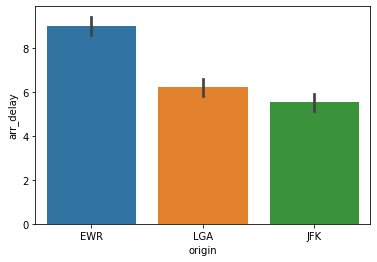

In [43]:
sns.barplot(df['origin'],df['arr_delay'])

C:\Users\Bharath\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='origin', ylabel='dep_delay'>

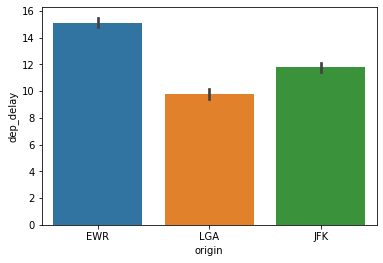

In [44]:
sns.barplot(df['origin'],df['dep_delay'])

In [41]:
df=pd.get_dummies(df,drop_first=True)
df

,year,day,dep_time,dep_delay,arr_time,arr_delay,air_time,distance,hour,minute,...,date_2013-9-28,date_2013-9-29,date_2013-9-3,date_2013-9-30,date_2013-9-4,date_2013-9-5,date_2013-9-6,date_2013-9-7,date_2013-9-8,date_2013-9-9
0,2013,1,1315.0,-2.0,1413.0,-10.0,33.0,143,13.0,15.0,...,0,0,0,0,0,0,0,0,0,0
1,2013,1,1655.0,34.0,1804.0,40.0,36.0,143,16.0,55.0,...,0,0,0,0,0,0,0,0,0,0
2,2013,1,2056.0,52.0,2156.0,44.0,31.0,143,20.0,56.0,...,0,0,0,0,0,0,0,0,0,0
3,2013,2,1332.0,5.0,1419.0,-14.0,33.0,143,13.0,32.0,...,0,0,0,0,0,0,0,0,0,0
4,2013,2,1746.0,85.0,1835.0,71.0,31.0,143,17.0,46.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145727,2013,31,1850.0,-10.0,2210.0,-5.0,348.0,2475,18.0,50.0,...,0,0,0,0,0,0,0,0,0,0
145728,2013,31,1922.0,0.0,2305.0,15.0,357.0,2454,19.0,22.0,...,0,0,0,0,0,0,0,0,0,0
145729,2013,31,2014.0,-1.0,2333.0,-10.0,347.0,2475,20.0,14.0,...,0,0,0,0,0,0,0,0,0,0
145730,2013,31,2037.0,-3.0,2351.0,-8.0,354.0,2475,20.0,37.0,...,0,0,0,0,0,0,0,0,0,0
